# ATM Transaction Fraud Detection System

## Problem statement
An Australian bank has been experiencing financial losses and reputational risks due to fraudulent ATM transactions. These fraudulent cases are rare but critical, making traditional fraud detection approaches ineffective.

To solve this, PredCatch Analytics has been engaged to build a predictive model that can accurately identify and flag fraudulent ATM transactions in real time, helping the bank reduce and potentially eliminate such incidents.

### Importing Libraries

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import sklearn
from sklearn.model_selection import train_test_split 

### Loading the Datasets

In [2]:
geo=pd.read_csv("Geo_scores.csv")
instance=pd.read_csv("instance_scores.csv")
lmbda=pd.read_csv("Lambda_wts.csv")
qset=pd.read_csv("Qset_tats.csv")
test=pd.read_csv("test_share.csv")
train=pd.read_csv("train.csv")

### Understanding the Shape of Each Dataset

In [3]:
print("Geo:     ", geo.shape)
print("Instance:", instance.shape)
print("Lambda:  ", lmbda.shape)
print("Qset:    ", qset.shape)
print("Test:    ", test.shape)
print("Train:   ", train.shape)

Geo:      (1424035, 2)
Instance: (1424035, 2)
Lambda:   (1400, 2)
Qset:     (1424035, 2)
Test:     (56962, 27)
Train:    (227845, 28)


### Previewing the First Few Rows of Each Dataset

In [4]:
print(geo.head(2))
print("-------------------")
print(instance.head(2))
print("-------------------")
print(lmbda.head(2))
print("-------------------")
print(qset.head(2))
print("-------------------")
print(test.head(2))
print("-------------------")
print(train.head(2))

       id  geo_score
0   26674       4.48
1  204314       4.48
-------------------
       id  instance_scores
0  173444            -0.88
1  259378             1.50
-------------------
    Group  lambda_wt
0  Grp936       3.41
1  Grp347      -2.88
-------------------
       id  qsets_normalized_tat
0    9983                  2.41
1  266000                  3.10
-------------------
       id   Group      Per1      Per2  Per3      Per4  Per5      Per6  Per7  \
0  146574  Grp229 -0.300000  1.540000  0.22 -0.280000  0.57  0.260000  0.70   
1  268759  Grp141  0.633333  0.953333  0.81  0.466667  0.91  0.253333  1.04   

       Per8  ...      Dem7      Dem8      Dem9     Cred1     Cred2     Cred3  \
0  1.076667  ...  0.786667  0.546667  0.313333  0.703333  0.813333  0.776667   
1  0.550000  ...  0.636667  0.770000  0.993333  0.536667  0.703333  0.806667   

      Cred4     Cred5     Cred6  Normalised_FNT  
0  0.796667  0.823333  0.783333       -249.7500  
1  0.630000  0.673333  0.673333       

### Inspecting Dataset Information

In [5]:
print(geo.info())
print("-------------------")
print(instance.info())
print("-------------------")
print(lmbda.info())
print("-------------------")
print(qset.info())
print("-------------------")
print(test.info())
print("-------------------")
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Group      1400 non-null   object 
 1   lambda_wt  1400 non-null   float6

###  Checking for Missing Values

In [6]:
print(geo.isnull().sum())
print("-------------------")
print(instance.isnull().sum())
print("-------------------")
print(lmbda.isnull().sum())
print("-------------------")
print(qset.isnull().sum())
print("-------------------")
print(test.isnull().sum())
print("-------------------")
print(train.isnull().sum())

id               0
geo_score    71543
dtype: int64
-------------------
id                 0
instance_scores    0
dtype: int64
-------------------
Group        0
lambda_wt    0
dtype: int64
-------------------
id                           0
qsets_normalized_tat    103201
dtype: int64
-------------------
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
dtype: int64
-------------------
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per

#### Found missing values in geo_score and qsets_normalized_tat columns which need to be handled before model building

### Checking the number of unique IDs and groups in each dataset

In [7]:
print("****************** Unique ID to the customer ***************")
print("Geo",geo['id'].nunique())
print("-------------------")
print("Instance",instance['id'].nunique())
print("-------------------")
print("qset",qset['id'].nunique())
print("-------------------")
print("test",test['id'].nunique())
print("-------------------")
print("train",train['id'].nunique())
print("****************** Unique Group to the customer ***************")
print("-------------------")
print("lmbda",lmbda['Group'].nunique())
print("-------------------")
print("test",test['Group'].nunique())
print("-------------------")
print("train",train['Group'].nunique())
print("-------------------")

****************** Unique ID to the customer ***************
Geo 284807
-------------------
Instance 284807
-------------------
qset 284807
-------------------
test 56962
-------------------
train 227845
****************** Unique Group to the customer ***************
-------------------
lmbda 1400
-------------------
test 915
-------------------
train 1301
-------------------


### Checking missing values percentage in 'geo' and 'qset' dataset

In [8]:
print(geo.isnull().sum()/len(geo)*100)
print("***********")
print(qset.isnull().sum()/len(geo)*100)


id           0.000000
geo_score    5.023964
dtype: float64
***********
id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64


In [9]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


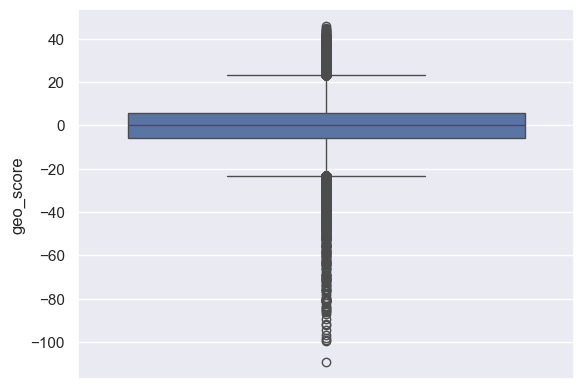

In [10]:
sns.boxplot(y='geo_score',data=geo)
plt.show()

In [11]:
qset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1320834 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


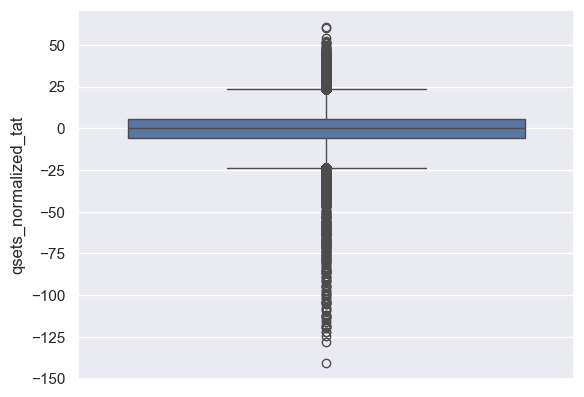

In [12]:
sns.boxplot(y='qsets_normalized_tat',data=qset)
plt.show()

### Imputing missing values in geo_score and qsets_normalized_tat

In [13]:
geo['geo_score']=geo['geo_score'].fillna(geo['geo_score'].median())
qset['qsets_normalized_tat']=qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

In [14]:
print(geo.isnull().sum()/len(geo)*100)
print("*****************")
print(qset.isnull().sum()/len(geo)*100)

id           0.0
geo_score    0.0
dtype: float64
*****************
id                      0.0
qsets_normalized_tat    0.0
dtype: float64


In [15]:
geo.describe()

,id,geo_score
count,1.424035e+06,1.424035e+06
mean,1.424030e+05,9.034321e-03
std,8.221673e+04,7.628149e+00
min,0.000000e+00,-1.093900e+02
25%,7.120100e+04,-5.170000e+00
50%,1.424030e+05,1.800000e-01
75%,2.136050e+05,5.170000e+00
max,2.848060e+05,4.581000e+01


In [16]:
test.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125


In [17]:
test.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.57,0.260000,0.70,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.91,0.253333,1.04,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125


In [18]:
train['data'] = 'train'
test['data'] = 'test'

In [19]:
train.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.726667,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.743333,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0,train


In [20]:
# adding  both table together
all_data=pd.concat([train,test],axis=0)

In [21]:
all_data.shape

(284807, 29)

In [22]:
print("******************Unique ID to the customer***************")
print("Geo",geo['id'].nunique())
print("-------------------")
print("Instance",instance['id'].nunique())
print("-------------------")
print("qset",qset['id'].nunique())
print("-------------------")
print("all_data",all_data['id'].nunique())
print("-------------------")
print("******************Unique Group to the customer***************")
print("-------------------")
print("lmbda",lmbda['Group'].nunique())
print("-------------------")
print("test",test['Group'].nunique())
print("-------------------")
print("all_data",all_data['Group'].nunique())
print("-------------------")

******************Unique ID to the customer***************
Geo 284807
-------------------
Instance 284807
-------------------
qset 284807
-------------------
all_data 284807
-------------------
******************Unique Group to the customer***************
-------------------
lmbda 1400
-------------------
test 915
-------------------
all_data 1400
-------------------


In [23]:
geo.shape

(1424035, 2)

In [24]:
geo.describe()

,id,geo_score
count,1.424035e+06,1.424035e+06
mean,1.424030e+05,9.034321e-03
std,8.221673e+04,7.628149e+00
min,0.000000e+00,-1.093900e+02
25%,7.120100e+04,-5.170000e+00
50%,1.424030e+05,1.800000e-01
75%,2.136050e+05,5.170000e+00
max,2.848060e+05,4.581000e+01


In [25]:
geo=geo.groupby('id').mean()
instance= instance.groupby('id').mean()
qset= qset.groupby('id').mean()

In [26]:
geo.shape

(284807, 1)

In [27]:
instance.shape

(284807, 1)

In [28]:
instance.describe()

,instance_scores
count,284807.000000
mean,-0.000003
std,1.088851
min,-24.590000
25%,-0.540000
50%,-0.090000
75%,0.450000
max,23.750000


In [29]:
all_data= pd.merge(all_data,lmbda, on='Group',how='left')

In [30]:
all_data.head(2)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.34,1.010000,...,0.606667,1.01,0.933333,0.603333,0.686667,0.673333,-245.75,0.0,train,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.81,0.783333,...,0.680000,0.69,0.560000,0.670000,0.553333,0.653333,-248.00,0.0,train,0.66


In [31]:
all_data= pd.merge(all_data,geo, on='id',how='left')

In [32]:
all_data= pd.merge(all_data,instance, on='id',how='left')

In [33]:
all_data= pd.merge(all_data,qset, on='id',how='left')

In [34]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,-0.13,0.256,-0.06,-0.700
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,0.66,-0.250,0.52,0.140
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.51,-0.950,1.56,-0.430
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.72,0.490,0.70,-0.302
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.60,0.850,-0.47,-0.630


In [35]:
all_data.shape

(284807, 33)

### EDA 

In [36]:
from ydata_profiling import ProfileReport
reports = ProfileReport(all_data)
reports.to_file(output_file='output.html')

Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.87it/s]


In [37]:
train=all_data[all_data['data']=='train']
test=all_data[all_data['data']=='test']

In [38]:
train.shape

(227845, 33)

In [39]:
test.shape

(56962, 33)

In [40]:
train.columns


Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'lambda_wt', 'geo_score',
       'instance_scores', 'qsets_normalized_tat'],
      dtype='object')

### Dropping Unnecessary Columns

In [41]:
train= train.drop(['id','data'],axis=1)  # Building a model
test= test.drop(['id','data','Target'],axis=1) # prediction and final result

#### Dropped irrelevant columns to keep only features required for model training and prediction.

In [42]:
test.isnull().sum()

Group                   0
Per1                    0
Per2                    0
Per3                    0
Per4                    0
Per5                    0
Per6                    0
Per7                    0
Per8                    0
Per9                    0
Dem1                    0
Dem2                    0
Dem3                    0
Dem4                    0
Dem5                    0
Dem6                    0
Dem7                    0
Dem8                    0
Dem9                    0
Cred1                   0
Cred2                   0
Cred3                   0
Cred4                   0
Cred5                   0
Cred6                   0
Normalised_FNT          0
lambda_wt               0
geo_score               0
instance_scores         0
qsets_normalized_tat    0
dtype: int64

In [43]:
test.columns

Index(['Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8',
       'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8',
       'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'lambda_wt', 'geo_score', 'instance_scores',
       'qsets_normalized_tat'],
      dtype='object')

In [44]:
unseen_test_data=test.copy()

In [45]:
unseen_test_data['Group']=unseen_test_data['Group'].astype('category')
unseen_test_data['Group']=unseen_test_data['Group'].cat.codes
unseen_test_data['Group']

227845    277
227846    180
227847    231
227848    485
227849    504
         ... 
284802     11
284803    569
284804    765
284805    163
284806    222
Name: Group, Length: 56962, dtype: int16

In [46]:
train.isnull().sum()

Group                   0
Per1                    0
Per2                    0
Per3                    0
Per4                    0
Per5                    0
Per6                    0
Per7                    0
Per8                    0
Per9                    0
Dem1                    0
Dem2                    0
Dem3                    0
Dem4                    0
Dem5                    0
Dem6                    0
Dem7                    0
Dem8                    0
Dem9                    0
Cred1                   0
Cred2                   0
Cred3                   0
Cred4                   0
Cred5                   0
Cred6                   0
Normalised_FNT          0
Target                  0
lambda_wt               0
geo_score               0
instance_scores         0
qsets_normalized_tat    0
dtype: int64

In [47]:
train['Group'] = train['Group'].astype('category')
train['Group'] = train['Group'].cat.codes

In [48]:
# slpit the data into ind and dep variable
x=train.drop(['Target'],axis=1)
y=train['Target']

In [49]:
y.value_counts(normalize=True)

Target
0.0    0.998271
1.0    0.001729
Name: proportion, dtype: float64

### Splitting Data into Train and Test Sets

In [50]:
# split the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=101,stratify=y)

In [51]:
y_train.value_counts()

Target
0.0    181961
1.0       315
Name: count, dtype: int64

In [52]:
y_test.value_counts()

Target
0.0    45490
1.0       79
Name: count, dtype: int64

### Model Building — Random Forest

In [53]:
# Building model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(x_train, y_train)


RandomForestClassifier()

In [54]:
y_pred_train = rfmodel.predict(x_train)
y_pred_test = rfmodel.predict(x_test)

In [55]:
from sklearn.metrics import classification_report,accuracy_score

In [56]:
print(classification_report(y_train,y_pred_train))
print("*****************")
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

*****************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       0.95      0.72      0.82        79

    accuracy                           1.00     45569
   macro avg       0.97      0.86      0.91     45569
weighted avg       1.00      1.00      1.00     45569



In [57]:
print(accuracy_score(y_train,y_pred_train))
print("*******************")
print(accuracy_score(y_test,y_pred_test))

1.0
*******************
0.9994513814215804


### Cross-Validation Evaluation

In [58]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Perform 5-fold cross-validation on the training data
cv_results = cross_validate(
    rfmodel,
    x_train,
    y_train,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=False
)

# Print average scores
print("🔁 Cross-Validation Results (on Training Data):")
print(f"Average Accuracy : {cv_results['test_accuracy'].mean():.4f}")
print(f"Average Precision: {cv_results['test_precision'].mean():.4f}")
print(f"Average Recall   : {cv_results['test_recall'].mean():.4f}")
print(f"Average F1 Score : {cv_results['test_f1'].mean():.4f}")

🔁 Cross-Validation Results (on Training Data):
Average Accuracy : 0.9995
Average Precision: 0.9390
Average Recall   : 0.7810
Average F1 Score : 0.8520


### ROC-AUC Curve Evaluation

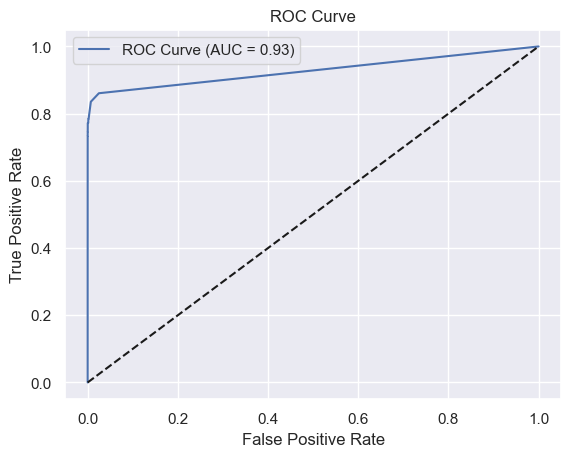

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba_test = rfmodel.predict_proba(x_test)[:, 1]  # Probabilities for class 1

fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
auc = roc_auc_score(y_test, y_proba_test)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##### Generating Final Predictions on Unseen Data

In [59]:
final_output= rfmodel.predict(unseen_test_data)

In [60]:
final_output

array([0., 0., 0., ..., 0., 0., 0.])

In [61]:
final_output = pd.DataFrame(final_output)
final_output.columns

RangeIndex(start=0, stop=1, step=1)

In [62]:
final_output.to_csv("Final_Target_Value.csv")

In [63]:
final_output.value_counts()

0  
0.0    56882
1.0       80
Name: count, dtype: int64